In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, fpmax
from math import isnan
df = pd.read_csv('../csvs/lab6.csv',encoding='cp1251')
print(df.head(5))

   id  gender  age  income     product
0   1    Male   19      15  cigarettes
1   2    Male   21      15        milk
2   3  Female   20      16   chocolate
3   4  Female   23      16        milk
4   5  Female   31      17       bread


In [128]:
np_df = df.to_numpy()
np_df = [[elem for elem in row[4:] if isinstance(elem,str)] for row in np_df]
print(np_df)

[['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate'], ['milk'], ['water '], ['oil'], ['chocolate'], ['oil'], ['chocolate'], ['chocolate'], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines'], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines'], ['cigarettes'], ['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate'], ['milk'], ['water '], ['oil'], ['chocolate'], ['oil'], ['chocolate'], ['chocolate'], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines'], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines'], ['cigarettes'], ['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocola

In [129]:
unique_items = df['product'].unique()
unique_items

array(['cigarettes', 'milk', 'chocolate', 'bread', 'water ', 'oil',
       'flakes ', 'tangerines'], dtype=object)

In [130]:
te = TransactionEncoder()
te_ary = te.fit_transform(np_df)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new.head()


,bread,chocolate,cigarettes,flakes,milk,oil,tangerines,water
0,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False


In [131]:
fpg = fpgrowth(df_new, min_support=0.03, use_colnames = True)
print(fpg.sort_values(by='support', ascending=False))
fpm = fpmax(df_new, min_support=0.03, use_colnames = True)
print(fpm.sort_values(by='support', ascending=False))

    support      itemsets
0  0.186869  (cigarettes)
4  0.181818      (water )
2  0.156566   (chocolate)
1  0.131313        (milk)
7  0.121212  (tangerines)
3  0.101010       (bread)
5  0.060606         (oil)
6  0.060606     (flakes )
    support      itemsets
7  0.186869  (cigarettes)
6  0.181818      (water )
5  0.156566   (chocolate)
4  0.131313        (milk)
3  0.121212  (tangerines)
2  0.101010       (bread)
0  0.060606     (flakes )
1  0.060606         (oil)


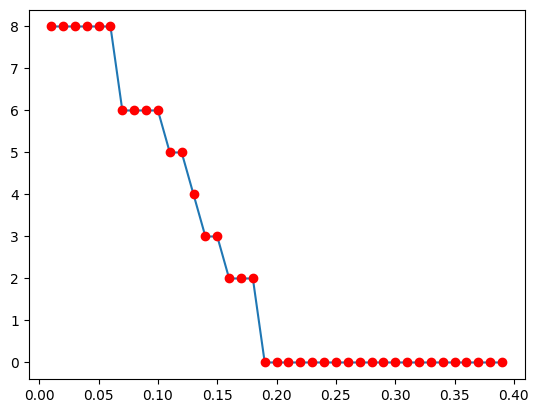

In [132]:
min_support_range = np.arange(0.01, 0.4, 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpg = fpgrowth(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpg))
    fpg['length'] = fpg['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpg['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpg))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()

1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;

In [133]:
nlp_ru_df = pd.read_json("../csvs/nlp_beat.jsonl", lines=True)
nlp_ru_df.head(5)

,question_id,question,answer,topic,author,tour_name,tour_link
0,0,Фраза «You talkin' to me?» («Это ты мне сказал...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
1,1,Немецкая панк-рок группа «The Bates» взяла сво...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
2,2,Из-за обилия секса и насилия ЭТА экранизация б...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
3,3,"ЭТОТ фильм, основанный на автобиографическом п...",NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
4,4,В 2003 году ЭТОТ фильм режиссеров Фернанду Мей...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN



2. Переформировать нужную колонку;

In [134]:
ids = nlp_ru_df['question_id'].unique()
ids_tour_names = [[el for el in nlp_ru_df[nlp_ru_df['question_id'] == id]['tour_name']] for id in ids]
print(ids_tour_names[:10], '...')

[['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена'], ['Кубок хитрого собакена']] ...



3. Вывести уникальное количество значений;

In [135]:
print("Кол-ва уникальных названий тура: ", len(nlp_ru_df['tour_name'].unique()), nlp_ru_df['tour_name'].unique())

Кол-ва уникальных названий тура:  4 ['Кубок хитрого собакена' 'Svoyachok' 'Тапир и Свояк'
 'Большой летний тройник']



4. Преобразовать данные к формату воспользовавшись TransactionEncoder;

In [136]:
te = TransactionEncoder()
te_ary = te.fit_transform(ids_tour_names)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
print(df_new)


     Svoyachok  Большой летний тройник  Кубок хитрого собакена  Тапир и Свояк
0        False                   False                    True          False
1        False                   False                    True          False
2        False                   False                    True          False
3        False                   False                    True          False
4        False                   False                    True          False
..         ...                     ...                     ...            ...
515      False                    True                   False          False
516      False                    True                   False          False
517      False                    True                   False          False
518      False                    True                   False          False
519      False                    True                   False          False

[520 rows x 4 columns]



5. Провести ассоциативный анализ с помощью алгоритмов FPGrowth и
FPmax.

In [137]:
nlp_fpg = fpgrowth(df_new, min_support=0.03, use_colnames = True)
print(nlp_fpg)

nlp_fpm = fpmax(df_new, min_support=0.03, use_colnames = True)
print("\n\n",nlp_fpm)

    support                  itemsets
0  0.644231  (Кубок хитрого собакена)
1  0.138462               (Svoyachok)
2  0.067308           (Тапир и Свояк)
3  0.150000  (Большой летний тройник)


     support                  itemsets
0  0.067308           (Тапир и Свояк)
1  0.138462               (Svoyachok)
2  0.150000  (Большой летний тройник)
3  0.644231  (Кубок хитрого собакена)


In [138]:
print(nlp_fpg)

    support                  itemsets
0  0.644231  (Кубок хитрого собакена)
1  0.138462               (Svoyachok)
2  0.067308           (Тапир и Свояк)
3  0.150000  (Большой летний тройник)


6. Визуализировать результаты двух методов.

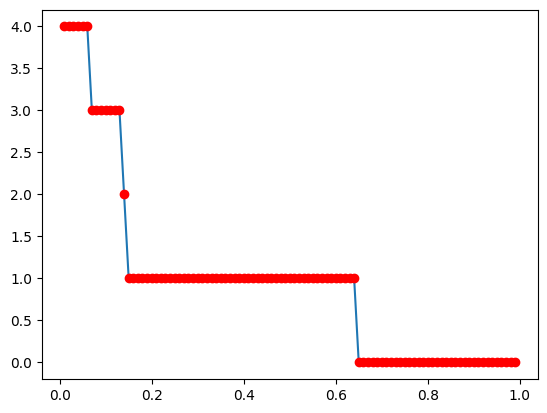

In [139]:
min_support_range = np.arange(0.01, 1., 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpg = fpgrowth(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpg))
    fpg['length'] = fpg['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpg['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpg))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()

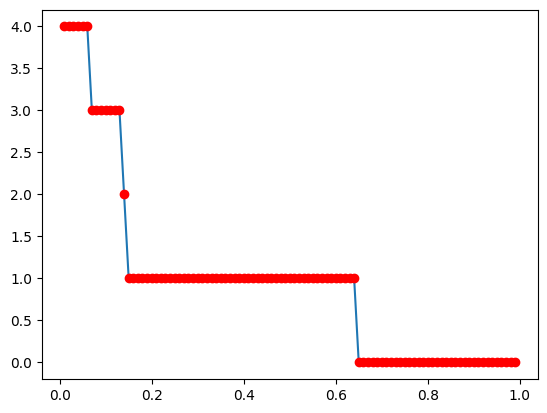

In [140]:
min_support_range = np.arange(0.01, 1., 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpm = fpmax(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpm))
    fpm['length'] = fpm['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpm['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpm))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()

7. Описать разницу методов и результаты.
- В нашем примере алгоритмы отработали одинакова
# Когда результаты FPGrowth и FPMax будут отличаться
* Результаты FPGrowth и FPMax будут отличаться, когда существуют частые паттерны, которые являются подмножествами других частых паттернов. FPGrowth найдет все такие паттерны, тогда как FPMax отфильтрует их и оставит только максимальные.

* Например, если у нас есть частые паттерны {A, B}, {A, B, C}, {A, B, C, D}, FPMax оставит только {A, B, C, D}, так как это единственный максимальный паттерн.

# Преимущества и недостатки
* FPGrowth: 
1) Позволяет найти все частые паттерны. 
2) Может генерировать большое количество паттернов, что может быть сложно для анализа.


* FPMax:

1) Находит только максимальные частые паттерны, что уменьшает объем данных для анализа.
2) Может пропустить полезную информацию о частых подмножествах.

5я:
1) apriori при sup(0.1,0.2,0.3) вывести itemsets длиной 2, 
2) при sup(0.3) вывести цепочки длины 2 и со словом йогурт
3) теория про apriori

In [141]:

ot5_df = pd.read_csv('../csvs/5otchet.csv',encoding='cp1251')
print(ot5_df.head(5))

   2000-01-01  1         yogurt
0  2000-01-01  1           pork
1  2000-01-01  1  sandwich bags
2  2000-01-01  1     lunch meat
3  2000-01-01  1   all- purpose
4  2000-01-01  1          flour


In [142]:
print(ot5_df.columns)
ot5_df.columns = ['transact_date','transact_id', 'product']
ot5_df = ot5_df.drop('transact_date', axis=1)
print(ot5_df.head())

products = ot5_df['product'].unique()
print(products)

tr_ids = ot5_df['transact_id'].unique()

print(len(tr_ids))

Index(['2000-01-01', '1', 'yogurt'], dtype='object')
   transact_id        product
0            1           pork
1            1  sandwich bags
2            1     lunch meat
3            1   all- purpose
4            1          flour
['pork' 'sandwich bags' 'lunch meat' 'all- purpose' 'flour' 'soda'
 'butter' 'vegetables' 'beef' 'aluminum foil' 'dinner rolls' 'shampoo'
 'mixes' 'soap' 'laundry detergent' 'ice cream' 'toilet paper' 'hand soap'
 'waffles' 'cheeses' 'milk' 'dishwashing liquid/detergent'
 'individual meals' 'yogurt' 'cereals' 'tortillas' 'spaghetti sauce'
 'ketchup' 'sandwich loaves' 'poultry' 'bagels' 'eggs' 'juice' 'pasta'
 'paper towels' 'coffee/tea' 'fruits' 'sugar']
1139


In [143]:
ids_products = [[el for el in ot5_df[ot5_df['transact_id'] == id]['product']] for id in tr_ids]
print(ids_products[:10], '...')

[['pork', 'sandwich bags', 'lunch meat', 'all- purpose', 'flour', 'soda', 'butter', 'vegetables', 'beef', 'aluminum foil', 'all- purpose', 'dinner rolls', 'shampoo', 'all- purpose', 'mixes', 'soap', 'laundry detergent', 'ice cream', 'dinner rolls'], ['toilet paper', 'shampoo', 'hand soap', 'waffles', 'vegetables', 'cheeses', 'mixes', 'milk', 'sandwich bags', 'laundry detergent', 'dishwashing liquid/detergent', 'waffles', 'individual meals', 'hand soap', 'vegetables', 'individual meals', 'yogurt', 'cereals', 'shampoo', 'vegetables', 'aluminum foil', 'tortillas', 'mixes'], ['soda', 'pork', 'soap', 'ice cream', 'toilet paper', 'dinner rolls', 'hand soap', 'spaghetti sauce', 'milk', 'ketchup', 'sandwich loaves', 'poultry', 'toilet paper', 'ice cream', 'ketchup', 'vegetables', 'laundry detergent', 'spaghetti sauce', 'bagels', 'soap', 'ice cream', 'shampoo', 'lunch meat', 'cereals', 'spaghetti sauce', 'pork', 'vegetables', 'cheeses', 'eggs', 'vegetables', 'vegetables'], ['cereals', 'juice', 

In [144]:
te = TransactionEncoder()
te_ary = te.fit_transform(ids_products)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
print(df_new)

      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
...            ...            ...     ...    ...     ...      ...      ...   
1134          True          False   False   True   False     True     True   
1135         False          False   False  False   False     True     True   
1136         False          False    True   True   False    False    False   
1137          True          False   False   True   False    False     True   
1138         False          False   False  False   False    False    False   

      coffee/tea  dinner rolls  dishwashing liquid/detergent  .

In [145]:
sups = [0.1, 0.2, 0.3]
f_sups = []
for sup in sups:
    fpg = fpgrowth(df_new, min_support=sup, use_colnames = True)
    f_sups.append(fpg)
    print(fpg.loc[fpg.itemsets.map(len) == 2]['itemsets'])



38       (ice cream, vegetables)
39          (ice cream, poultry)
41      (lunch meat, vegetables)
42       (ice cream, lunch meat)
43         (lunch meat, poultry)
                  ...           
1369      (aluminum foil, sugar)
1370       (paper towels, sugar)
1371            (cereals, sugar)
1372      (sandwich bags, sugar)
1373              (mixes, sugar)
Name: itemsets, Length: 703, dtype: object
38                       (ice cream, vegetables)
39                      (lunch meat, vegetables)
40                            (vegetables, soda)
41                    (dinner rolls, vegetables)
42                   (vegetables, aluminum foil)
43                            (soap, vegetables)
44               (laundry detergent, vegetables)
45                           (vegetables, mixes)
46                            (beef, vegetables)
47                    (all- purpose, vegetables)
48                         (shampoo, vegetables)
49                          (butter, vegetables)
50    

In [146]:
f = f_sups[-1]
print(f.loc[f.itemsets.map(len) == 2]['itemsets'])

38                       (ice cream, vegetables)
39                      (lunch meat, vegetables)
40                            (vegetables, soda)
41                    (dinner rolls, vegetables)
42                   (vegetables, aluminum foil)
43               (laundry detergent, vegetables)
44                         (vegetables, cereals)
45                         (waffles, vegetables)
46                         (cheeses, vegetables)
47    (dishwashing liquid/detergent, vegetables)
48                          (yogurt, vegetables)
49                         (vegetables, poultry)
50                            (vegetables, eggs)
51                          (bagels, vegetables)
Name: itemsets, dtype: object


In [147]:
f = f_sups[-1]
filtered_itemsets = f[f['itemsets'].apply(lambda x: len(x) == 2 and 'yogurt' in x)]
print(filtered_itemsets)

     support              itemsets
48  0.318701  (yogurt, vegetables)


### ШЕСТАЯ

* использовать разные метрики для асоциативных правил mse, median …

In [148]:
from mlxtend.frequent_patterns import association_rules

conf_rules = association_rules(f, metric="confidence", min_threshold=0.3)

print(conf_rules[['antecedents', 'consequents', 'confidence']])

                       antecedents                     consequents  confidence
0                      (ice cream)                    (vegetables)    0.759912
1                     (vegetables)                     (ice cream)    0.409739
2                     (lunch meat)                    (vegetables)    0.788889
3                     (vegetables)                    (lunch meat)    0.421615
4                     (vegetables)                          (soda)    0.413302
5                           (soda)                    (vegetables)    0.782022
6                   (dinner rolls)                    (vegetables)    0.792325
7                     (vegetables)                  (dinner rolls)    0.416865
8                     (vegetables)                 (aluminum foil)    0.420428
9                  (aluminum foil)                    (vegetables)    0.808219
10             (laundry detergent)                    (vegetables)    0.816705
11                    (vegetables)             (laun

### - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
### - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
### - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
### - leverage(A->C) = support(A->C) - support(A)*support(C) range: [-1, 1]
### - conviction = [1 - support(C)] / [1 - confidence(A->C)], range: [0, inf]
### - zhangs_metric(A->C) = leverage(A->C) / max(support(A->C)*(1-support(A)), support(A)*(support(C)-support(A->C))) range: [-1,1]

In [149]:
lev_rules = association_rules(f, metric="leverage", min_threshold=0)
lev_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ice cream),(vegetables),0.398595,0.739245,0.302897,0.759912,1.027957,0.008238,1.086081,0.045222
1,(vegetables),(ice cream),0.739245,0.398595,0.302897,0.409739,1.027957,0.008238,1.018879,0.104299
2,(lunch meat),(vegetables),0.395083,0.739245,0.311677,0.788889,1.067155,0.019613,1.235155,0.104029
3,(vegetables),(lunch meat),0.739245,0.395083,0.311677,0.421615,1.067155,0.019613,1.045872,0.241334
4,(vegetables),(soda),0.739245,0.390694,0.305531,0.413302,1.057867,0.016713,1.038534,0.209780


In [150]:
vic_rules = association_rules(f, metric="conviction", min_threshold=0)
vic_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ice cream),(vegetables),0.398595,0.739245,0.302897,0.759912,1.027957,0.008238,1.086081,0.045222
1,(vegetables),(ice cream),0.739245,0.398595,0.302897,0.409739,1.027957,0.008238,1.018879,0.104299
2,(lunch meat),(vegetables),0.395083,0.739245,0.311677,0.788889,1.067155,0.019613,1.235155,0.104029
3,(vegetables),(lunch meat),0.739245,0.395083,0.311677,0.421615,1.067155,0.019613,1.045872,0.241334
4,(vegetables),(soda),0.739245,0.390694,0.305531,0.413302,1.057867,0.016713,1.038534,0.209780


2) вывести fp граф

In [151]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import networkx as nx
import matplotlib.pyplot as plt

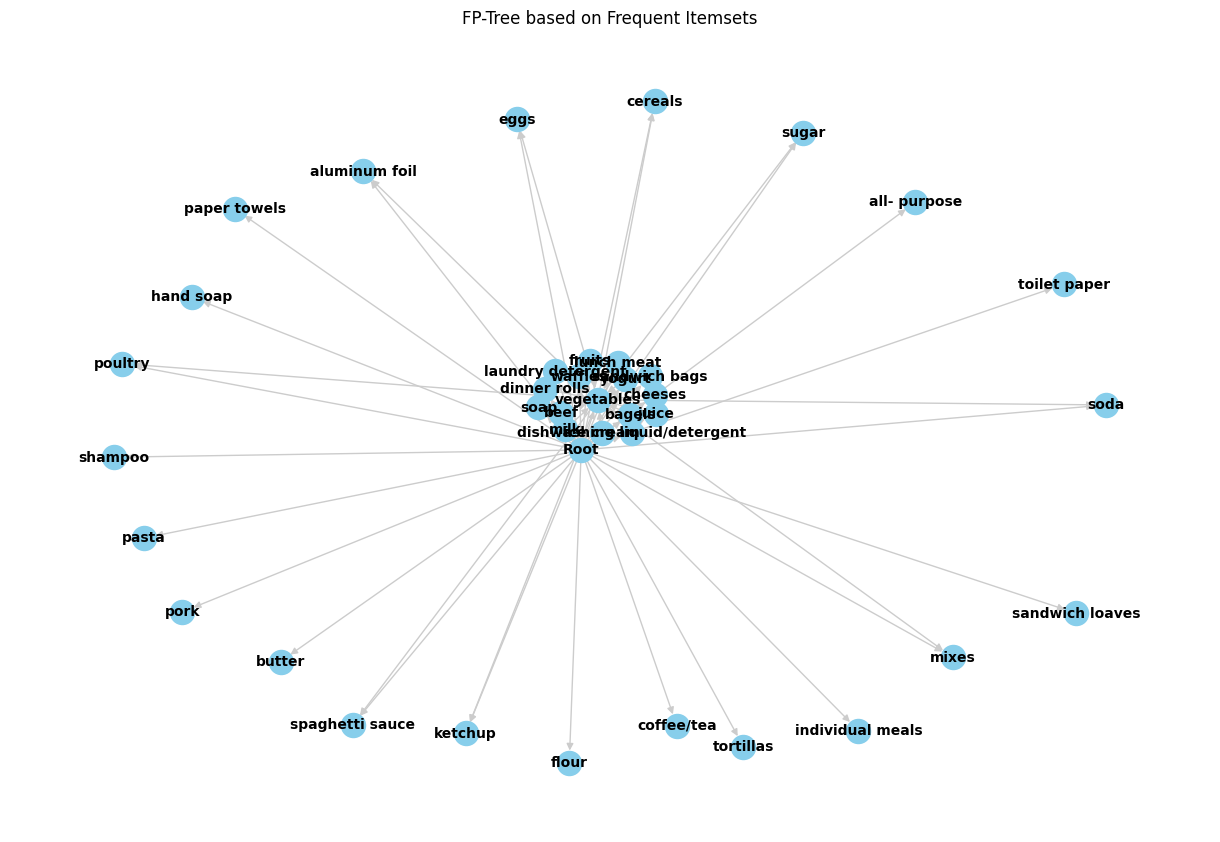

In [162]:
fp_new = fpgrowth(df_new, min_support=0.29, use_colnames = True)

# Функция для построения FP-дерева на основе частых itemsets
def construct_fp_tree_from_itemsets(frequent_itemsets):
    tree = nx.DiGraph()
    root = 'Root'
    tree.add_node(root)

    # Обход itemsets и добавление в дерево
    for idx, row in frequent_itemsets.iterrows():
        itemset = list(row['itemsets'])
        current_node = root
        for item in itemset:
            if not tree.has_edge(current_node, item):
                tree.add_edge(current_node, item)
            current_node = item

    return tree

# Построение FP-дерева на основе частых itemsets
fp_tree = construct_fp_tree_from_itemsets(fp_new)

# Визуализация FP-дерева
def plot_fp_tree(tree):
    pos = nx.spring_layout(tree)
    plt.figure(figsize=(12, 8))
    nx.draw(tree, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_weight="bold", edge_color="#CCCCCC")
    plt.title("FP-Tree based on Frequent Itemsets")
    plt.show()

plot_fp_tree(fp_tree)